## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

Uploading files to google colab.

## Importing data

In [2]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

Metadata:

**STATE:** 

State abbreviation (a nominal/symbolic field)

**PVASTATE**:

EPVA State or PVA State
Indicates whether the donor lives in a state served by the organization's EPVA chapter
P = PVA State
E = EPVA State (Northeastern US)

**DOB:**

Date of birth (YYMM, Year/Month format.)

**RECP3**                      

P3 File Flag_ = Not a P3 Record
X = Donor has given to PVA's P3 program

**MDMAUD**

The Major Donor Matrix code. The codes describe frequency and amount of
giving for donors who have given a $100+ gift at any time in their giving history. An RFA (recency/frequency/monetary) field. The (current) concatenated version is a nominal or symbolic field. The individual bytes could separately be used as fields and refer to the following: 
  
First byte: Recency of Giving:

*  C=Current Donor
*  L=Lapsed Donor
*  I=Inactive Donor
*  D=Dormant Donor
                           
2nd byte: Frequency of Giving:

*  1=One gift in the period of recency
*  2=Two-Four gifts in the period of recency
*  5=Five+ gifts in the period of recency
                           
3rd byte: Amount of Giving:

*   L=Less than $100(Low Dollar)

*   C=$100-499(Core)

*   M=$500-999(Major)

*   T=$1,000+(Top)
                           
4th byte: Blank/meaningless/filler:

**'X'** 

Indicates that the donor is not a major donor.

**'GENDER':** 

Gender of the donor

**DOMAIN**  

DOMAIN/Cluster code. A nominal or symbolic field. 
could be broken down by bytes as explained below.  
                           
1st byte = Urbanicity level of the donor's neighborhood

*   U=Urban
*   C=City
*   S=Suburban
*   T=Town
*   R=Rural
                           
2nd byte = Socio-Economic status of the neighborhood

*   1 = Highest SES
*   2 = Average SES
*   3 = Lowest SES (except for Urban communities, where 1 = Highest SES,2 = Above average SES,3 = Below average SES, 4 = Lowest SES.)

**HOMEOWNR:** Home Owner Flag:

*   H = Home owner 
*   U = Unknown

**'INCOME'** HOUSEHOLD INCOME:

**HV1**  Median Home Value in hundreds.

**HV2** Average Home Value in hundreds.

**HV3**  Median Contract Rent in hundreds.

**HV4** Average Contract Rent in hundreds 'IC1'.

**IC1**  Median Household Income in hundreds.

**IC2**  Median Family Income in hundreds.

**IC3**  Average Household Income in hundreds.

**IC4** Average Family Income in hundreds.

**IC5** Per Capita Income.

**'VETERANS'**:   

VETERANS (Y/N)

**'RFA_2'**  

Donor's RFA status as of 97NK promotion date 

**CARDPROM:** 

Lifetime number of card promotions received to date. Card promotions are promotion type: 

*   FS
*   GK
*   TK
*   SK
*   NK
*   XK
*   UF
*   UU

**MAXADATE:**

Date of the most recent promotion received (in YYMM, Year/Month format)

**NUMPROM:** 

Lifetime number of promotions received to date

**CARDPM12:**

Number of card promotions received in the last 12 months (in terms of calendar months translates into 9603-9702) 

**UMPRM12**

Number of promotions received in the last 12months (in terms of calendar months translates into 9603-9702)

**'NGIFTALL':**        

Number of lifetime gifts to date.

**'TIMELAG':**
Number of months between first and second gift neighborhood demographics 

**AGE901:** 

Median Age of Population

**AGE902:** 

Median Age of Adults 18 or Older

**AGE903:** 

Median Age of Adults 25 or Older

**'AVGGIFT'**

Average git amount

## Checking data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

## Checking for null values

In [6]:
nulls = pd.DataFrame(data.isna().sum()/len(data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,Customer,0.0
1,State,0.0
22,Vehicle Class,0.0
21,Total Claim Amount,0.0
20,Sales Channel,0.0
19,Renew Offer Type,0.0
18,Policy,0.0
17,Policy Type,0.0
16,Number of Policies,0.0
15,Number of Open Complaints,0.0


## Checking the numerical values

In [7]:
numericals = data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


*   The INCOME might be an important factor in predicting the gift value, so even though it has a lot of null values, we will not drop the column.

*   In this exercise, we will try a more precise method to replace the null values, instead of simply replacing them by a constant value, mean or median.

*   We will use a similar method for the column TIMELAG .

## Checking the **income's** histogram

<AxesSubplot:xlabel='Income', ylabel='Count'>

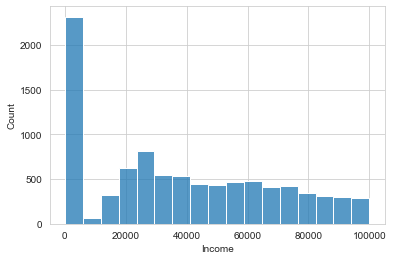

In [9]:
sns.histplot(data['Income'])

# Activity: Dealing with missing values.


Possible approaches:

**Drop:**

Let's consider the **gender** column. 

*   Can we guess in somehow what is the missing gender? **NO**. 
*   Can this column have any possible value compatible with a missing value? **NO**

Therefore, we are forced to drop the corresponding rows.

In [12]:
data['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [13]:
to_drop = data[~data['Gender'].isin(['F','M'])].index.tolist()
data.drop(to_drop, inplace = True)
data.reset_index(drop=True)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
data['GENDER'].value_counts()

**Replace:**

If we have some other information about that tells us we can do this, even if it is not the missing information. 

For example, if the data follow an approximately normal distribution, we might want to substitute the missing values with the mean. You always need to have something that "tells you" that you can replace the data.

Let's consider column **HOMEOWNR**. 

*   Can we guess the value? **NO**
*   Can this column have any possible value compatible with a missing value? **YES**: 'unknown'.

Therefore, we can replace the value in this column by **'U'** for 'unknown'.

In [14]:
data['Homeownr'].value_counts()

KeyError: 'Homeownr'

In [ ]:
np.unique(data['HOMEOWNR']).tolist()
data['HOMEOWNR'] = np.where(data['HOMEOWNR'] == ' ','U','H')

In [ ]:
data.head()

## Interpolation

Let's see which kind interpolation between two consecutive missing values for the **'INCOME'** column is best.

First **LOOK AT YOUR DATA!!!**

In [ ]:
data[['INCOME']].head()

In [ ]:
sns.histplot(data['INCOME'])

Let's try first with linear interpolation

In [ ]:
new_income_data_linear = data['INCOME'].interpolate(method='linear')
sns.histplot(new_income_data_linear)

Akima's interpolation

In [ ]:
new_income_data_akima = data['INCOME'].interpolate(method='akima')
sns.histplot(new_income_data_akima)

Polynomial order 3.

In [ ]:
new_income_data_poly = data['INCOME'].interpolate(method='polynomial', order=3)
sns.histplot(new_income_data_poly)

Imputing with the mean

In [ ]:
# Testing interpolation method with mean and median methods
points2 = data['INCOME'].fillna(np.mean(data['INCOME']))
sns.histplot(points2)

Does it makes sense at all?

# Activity: Using linear regression to impute missing values.

You already know how to predict a numerical ammount. Therefore, you can use other columns in order to predict the missing values of the column of you interest. Use 'HV1' and 'IC1' columns to predict the missing values of 'INCOME'.

**Hint**: For sake of simplicity, when you have NaN s, you work with them as if they were a test set.

In [ ]:
np.unique(data['Income'])

In [ ]:
pd.DataFrame(income_pred).isnull().sum()


In [ ]:
from sklearn.linear_model import LinearRegression

X = data[~data.INCOME.isnull()][['HV1', 'IC1']]
y = data[~data.INCOME.isnull()]['INCOME']

X_nulls = data[data.INCOME.isnull()][['HV1', 'IC1']]

model = LinearRegression().fit(X,y)
income_pred = model.predict(X_nulls)

data[data.INCOME.isnull()]['INCOME'] = np.round(income_pred) # Income values are integers, therefore, we need to round!
data.head()

Let's explore now the column 'TIMELAG'

In [ ]:
sns.histplot(data['TIMELAG'])

In [ ]:
sns.boxplot(x=data['TIMELAG'])

In [ ]:
ax = sns.distplot(data['TIMELAG'])
ax2 = ax.twinx()
sns.boxplot(x=data['TIMELAG'], ax=ax2)
ax2.set(ylim=(-.5, 10))

Let's try some transformations to see if we can improve the distribution.

In [ ]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

In [ ]:
# Using the functions to check the distribution of transformed data
pd.Series(map(log_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

pd.Series(map(sqrt_transfom_clean_, data['TIMELAG'])).hist()
plt.show()

As it can be seen in the figure, the logaritmic transformation works better than the sqrt. 

This could be expected given the extreme skewness of the data.

We could also us Box-Cox transformation, but probably the resulting distribution will be similar (alothough not the same, and even more, better). However, tihs is an illustrative example of how to proceed.

Let's assume that we don't know about Box-Cox and we want to apply the logaritmic transformation to the **'TIMELAG'** column.

In [ ]:
data['TIMELAG'] = list(map(log_transfom_clean_, data['TIMELAG']))

Remember that our function, ignored the'0' and infinite values. The may want to replace them the mean of the NEW distribution.

In [ ]:
data['TIMELAG'] = data['TIMELAG'].fillna(np.mean(data['TIMELAG']))
sns.distplot(data['TIMELAG'])
plt.show()

It's not perfectly Gaussian but we improved it a lot.

# Activity: Logarithmic transformation.

A logarithmic scale is common to visualize exponential data as they are the inverse function of each other, so the result would be a linear visualization. This is needed because we visualize exponential functions properly otherwise. As an example, you can see some corona virus visualizations, like [this one] (https://education-team-2020.s3-eu-west-1.amazonaws.com/data-analytics/4.1-COVID-Logarithmicvslinear.png). Check the log transform with the IC n columns.

In [ ]:
sns.distplot(data['IC1'])
#sns.distplot(np.log(data['IC1']))

In [ ]:
data['IC1'].describe()

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC1'], ax=axes[0], axlabel='IC1')
sns.distplot(np.log(data['IC1']+1), ax=axes[1], axlabel='log(IC1+1)')

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC2'], ax=axes[0], axlabel='IC2')
sns.distplot(np.log(data['IC2']+1), ax=axes[1], axlabel='log(IC2+1)')

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC3'], ax=axes[0], axlabel = 'IC3')
sns.distplot(np.log(data['IC3']+1), ax=axes[1], axlabel = 'log(IC3+1)')

In [ ]:
fig,axes=plt.subplots(1,2)
sns.distplot(data['IC4'], ax=axes[0], axlabel = 'IC4')
sns.distplot(np.log(data['IC4']+1), ax=axes[1], axlabel = 'log(IC4+1)')

Even after using the transformation, there is still some skewness in the column TIMELAG . We will remove the outliers only from the right side of the distribution plot.

In [ ]:
sns.distplot(data['TIMELAG'])

Let's start knowing how many values will be removed if we decide to drop all the values beyond the upper wisker.

In [ ]:
iqr = np.percentile(data['TIMELAG'],75) - np.percentile(data['TIMELAG'],25)
upper_limit = np.percentile(data['TIMELAG'],75) + 1.5*iqr
print("The upper wisker is at: %4.2f" % upper_limit)
outliers = data[data['TIMELAG'] > upper_limit].index.tolist()
print("The number of points outise the upper wisker is: ",len(outliers))

## Filtering outliers

Let's explore two different ways to drop outliers.

### Filter function. filter(lambda_function, column)

In [ ]:
points = list(filter(lambda x: x < upper_limit, data['TIMELAG']))
len(points)

### Panda's approach

In [ ]:
data = data[data['TIMELAG'] < upper_limit]
sns.distplot(data['TIMELAG'])
plt.show()

# Activity:

Let's learn how the following functions work::

*   Map
*   Filter
*   Reduce

## Map

This function, applies another given function to every element of a set.
It works **elementwise**.

In [ ]:
list(map(str,range(15)))

## Filter

This other function also works elementwise but it returns the elements which met a condition.

In [ ]:
list(filter(lambda x: x %2 == 0,range(15)))

## Reduce

This other function performs some computation on a list and returns the output of that computation applied all over the list. Is **NOT ELEMENTWISE**

In [ ]:
from functools import reduce

lst = list(range(6))
print("The list is: ",lst)
print("The result of appliying the reduce over the list is: ",reduce(lambda a,b: a+b,lst))

# Lesson 1 Key Concepts

## Selecting categorical data

In [ ]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

Let's check the number of missing values for 'PVASTATE' column

In [ ]:
data['PVASTATE'].value_counts()

Now for columns 'RECP3'

In [ ]:
data['RECP3'].value_counts()

And finally for 'VETERANS' column

In [ ]:
data['VETERANS'].value_counts()

Those columns have too much missing values. If we drop the rows containing those NA's we're in the risk of shrinking too much our dataset. Currently, we can't do too much with columns for which there are so many missing values, therefore let's drop them.

In [ ]:
data = data.drop(columns=['PVASTATE', 'RECP3', 'VETERANS'], axis=1)

# Activity:

For the column 'DOMAIN', discuss which option is better to clean the rows where the values are empty.

*  Option 1: Filtering the rows with the empty values.
*  Option 2: Replacing the empty values with some other category, the most frequently represented value in that column.

In [ ]:
data['DOMAIN'].value_counts()

In [ ]:
unique_values = list(np.unique(data['DOMAIN']))
print(unique_values)

This column a lot of many possible different values. It's difficult to thnik how to impute this values and the number of missing values is quite small compared with the aggregated amount of non missing values. Therefore, dropping the missing values will not hurt.

In [ ]:
data = data[data['DOMAIN'].isin(unique_values[1:])]
# Note after you filter, it is a good practice to reset the index
data = data.reset_index(drop=True)
data.head()

Let's check what we have now.

In [ ]:
data["DOMAIN"].value_counts()

# Lesson 2 Key Concepts

Let's consider the column 'GENDER'

In [ ]:
data['GENDER'].value_counts()

No missing values as we cleaned it this morning ;)

Now let's see if there are differences between the the 'AVGGIFT' by gender.

In [ ]:
# Visually analyzing categorical data with Target variable
sns.boxplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

In [ ]:
ax1 = sns.distplot(data['AVGGIFT'][data['GENDER'] == 'M'], color = 'Red')
ax2 = sns.distplot(data['AVGGIFT'][data['GENDER'] == 'F'], color = 'Blue')
plt.xlim(0, 200)

Both groups doesn't look too different. They have a few outliers.

**HOWEVER**, be carefull. You don't know now how the distributions look inside the boxes!

Let's check the average gift by gender.

In [ ]:
sns.barplot(x="GENDER", y="AVGGIFT", data=data)
plt.show()

We can conclude that the company doesn't make significant differences on the gift according to the gender. Therefore let's remove this column.

In [ ]:
data = data.drop(columns=['GENDER'], axis=1)

# Activity:

There is a more efficient way to use map over pandas dataframes, and it is called [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [ ]:
#data['GENDER'] = data['GENDER'].apply(lambda x: 'other' if x in ['',' ' ,'U', 'C', 'J', 'A'] else x)

# Lesson 3 Key Concepts.

## Dealing with a large number of categories

Let's inspect the column 'STATE'

In [ ]:
state_values = list(np.unique(data['STATE']))
state_values

Huuummm, there are typos... Which is 'AA'?. A current list of abreviations can be found [here](https://www.ssa.gov/international/coc-docs/states.html)

In [ ]:
real_states = ['AL','AK','AS','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS',
'KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','MP','OH','OK','OR',
'PA','PR','RI','SC','SD','TN','TX','UT','VT','VA','VI','WA','WV','WI','WY']

First we are going to filter out values which doesn't correspond to any of the previous list.

In [ ]:
data = data[data['STATE'].isin(real_states)]

Now, let's check the frequencies of each state.

In [ ]:
vals = pd.DataFrame(data['STATE'].value_counts())
vals = vals.reset_index()
vals.columns = ['state', 'counts']
vals

As we can see there are states which are under represented. We have several options.

*  Group the states in smaller groups.
*  Group under represented states in a single group.
*  A combination of both.

We will use the last option.

Given the previous state frequencies, can you guess any business insigth?

First, let's get the states which are under represented.

In [ ]:
group_states_df = vals[vals['counts']<2500]
group_states = list(group_states_df['state'])
group_states

In [ ]:
def clean_state(x):
    if x in group_states:
        return 'other'
    else:
        return x

data['STATE'] = list(map(clean_state, data['STATE']))

What are now our final groups?

In [ ]:
new_state_values = list(np.unique(data['STATE']))
new_state_values

## Binning numerical columns.

Let's see rigth now the 'IC2' column. This column is numerical, but we would like to make it categorical using. **binning**  



In [ ]:
ic2_labels = ['Low', 'Moderate', 'High', 'Very High']
data['IC2_NEW'] = pd.cut(data['IC2'],4, labels=ic2_labels) # see: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html?highlight=cut#pandas.cut
data['IC2_NEW'].value_counts()

# Activity:

Use the column MDMAUD to reduce the number of categories to two (XXXX and other).

In [ ]:
data["MDMAUD"].apply(lambda x: "other" if x != "XXXX" else x)
#data['MDMAUD_2'] = np.where(data['MDMAUD'] == "XXXX", "XXXX","other")

# Lesson 4 Key Concepts.

Regular expressions in Python. 

[see here](https://docs.python.org/3/library/re.html)

[practice here](https://pythex.org/)

*: Matches previous character 0 or more times.

+: Matches previous character 1 or more times.

?: Matches previous character 0 or 1 times (optional).

{}: Matches previous characters however many times specified within:.

{n}: Exactly n times.

{n,}: At least n times.

{n,m}: Between n and m times.

In [ ]:
import re

Let's see some examples.

In [ ]:
text = "The complicit caat interacted with the other cats exactly as we expected."
pattern = "c*t"
print(re.findall(pattern, text))

In [ ]:
text = "The complicit caat interacted with the other cats exactly as we expected."

pattern = 'c*a*t'
print(re.findall(pattern, text))

In [ ]:
text = "The complicit caaaat ct interacted with the other cats exactly as we expected."
pattern = "a+"
print(re.findall(pattern, text))

In [ ]:
text = "Is the correct spelling color or colour?"
pattern = "colou?r"
print(re.findall(pattern, text))

In [ ]:
text = "We can match the following: aaaawwww, aww, awww, awwww, awwwww"
pattern = "aw{3}"
print(re.findall(pattern, text))

In [ ]:
text = "Let's see how we can match the following: aaw, aaww, aawww, awwww, awwwww"
pattern = "aw{1,}"
print(re.findall(pattern, text))

In [ ]:
pattern = "a{2,}w{2,}"
print(re.findall(pattern, text))

# Activity:

Create a function to automate the process of reducing the number of values of a categorical column.

In [ ]:
def reduce_categorical(x, to_keep = [], to_replace = [], processed = "Other"):
    if x in to_keep or (to_keep == [] and x not in to_replace):
        return x
    else:
        return processed

In [ ]:
data.to_csv('unit4_partially_processed.csv', index=False) 